<a href="https://colab.research.google.com/github/Vinsocf/EDA1/blob/master/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import math
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d


% matplotlib inline


### Importing Data

In [45]:
# Read csv
data = pd.read_csv("https://raw.githubusercontent.com/Vinsocf/emotions/main/Wisconsin-bc-data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Analyzing Data

In [28]:
print "Number of data points :", len(data)

Number of data points : 569


In [29]:
# Describe data
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [30]:
# print columns
data.columns

Index([u'id', u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst',
       u'Unnamed: 32'],
      dtype='object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

### Preparing Data

In [32]:
# Save labels in y
y = data["diagnosis"]

### Selecting Features

We don't need pacient "id", "diagnosis" is our labels and "Unnamed: 32" have only NaNs. Let exclude this tree columns.

In [33]:
# Drop columns
X = data.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)

### Looking for correlation between features

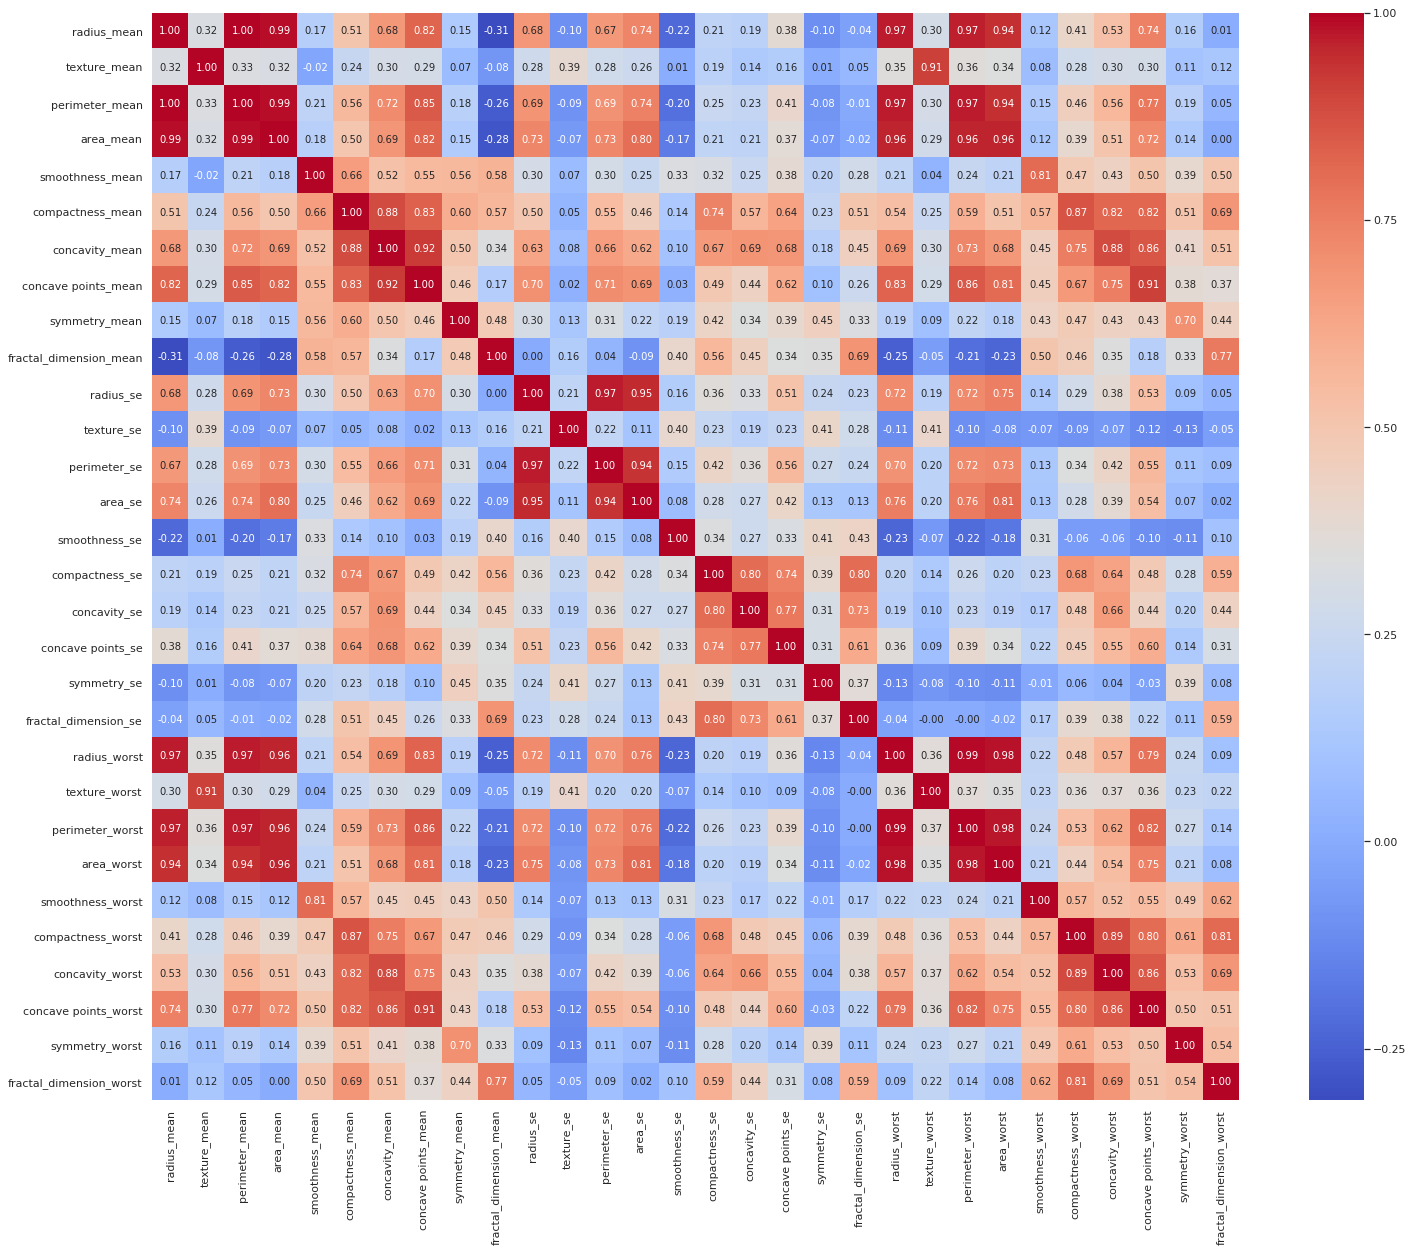

In [34]:
# Plot a Correlation chart
corr = X.corr() # .corr is used for find corelation
#plt.figure(figsize=(20,15))
sns.set(rc={'figure.figsize':(25,20)})
# plot a heatmap
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= X.columns, yticklabels= X.columns,
           cmap= 'coolwarm') 

### **There is some stronge correlations: **

Features like (something)_mean, (something)_se, (something)_worst, have a natural correlation because all these are generated using same data, for example: to generate radius_mean, radius_se and radius_worst, radius mesuraments is used. 


### Positive Correlation:

Radius, Perimeter and Area have stronge positive correlation

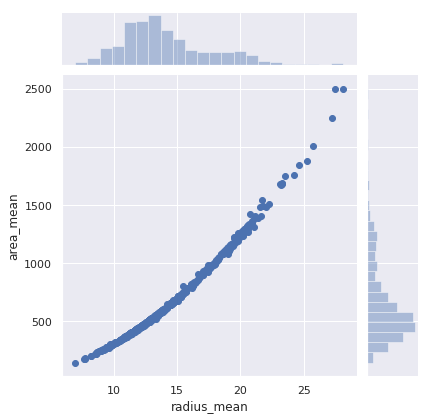

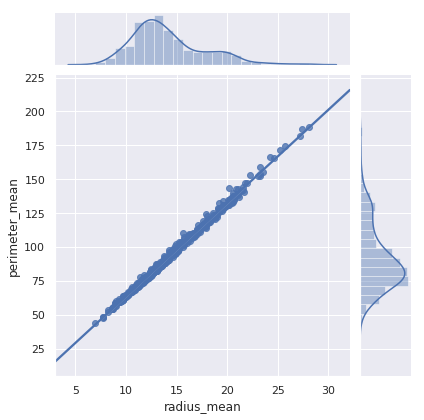

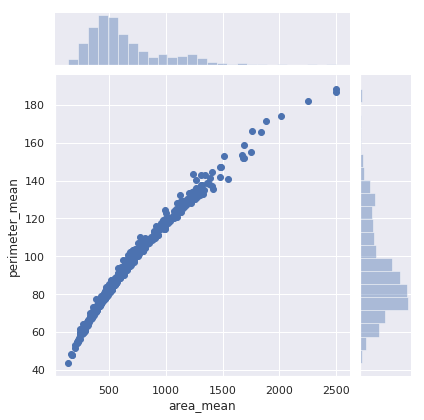

In [35]:
# Plot correlation between 2 features and distribution
sns.jointplot(X.loc[:,'radius_mean'], 
              X.loc[:,'area_mean'], 
              kind="scatter")

sns.jointplot(X.loc[:,'radius_mean'], 
              X.loc[:,'perimeter_mean'], 
              kind="regg")

sns.jointplot(X.loc[:,'area_mean'], 
              X.loc[:,'perimeter_mean'], 
              kind="scatter")

Radius have a strong positive correlation with Concave Points

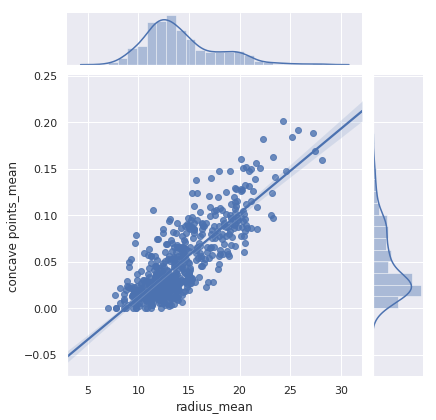

In [36]:
# Plot correlation between 2 features and distribution
sns.jointplot(X.loc[:,'radius_mean'], 
              X.loc[:,'concave points_mean'], 
              kind="regg")

Compacteness, Concavity and Concave Points have strong positive correlation

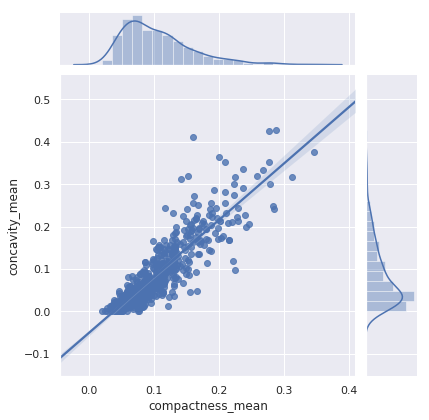

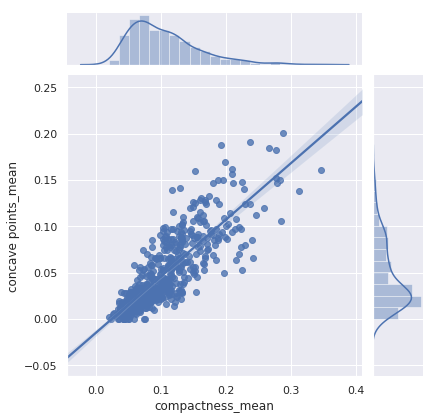

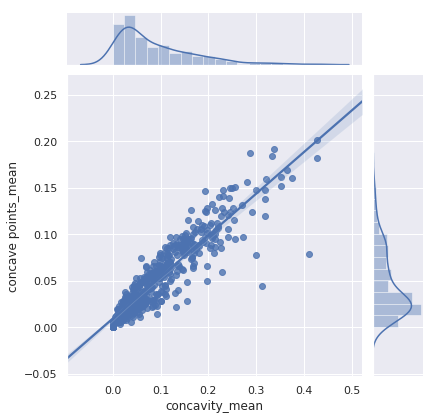

In [37]:
# Plot correlation between 2 features and distribution
sns.jointplot(X.loc[:,'compactness_mean'], 
              X.loc[:,'concavity_mean'], 
              kind="regg")

sns.jointplot(X.loc[:,'compactness_mean'], 
              X.loc[:,'concave points_mean'], 
              kind="regg")


sns.jointplot(X.loc[:,'concavity_mean'], 
              X.loc[:,'concave points_mean'], 
              kind="regg")


### Negative Correlation

Fractal Dimention have some negative correlation with Radius, Perimeter and Area  

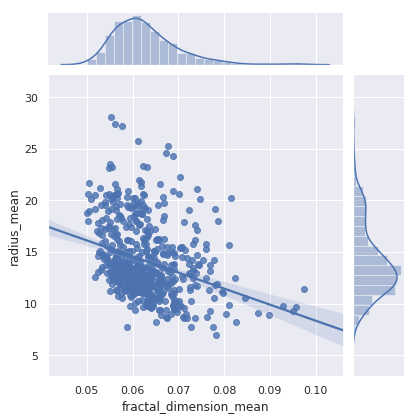

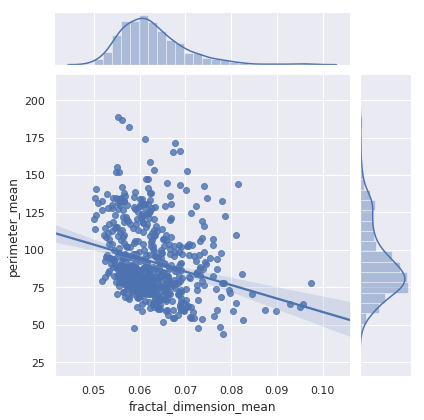

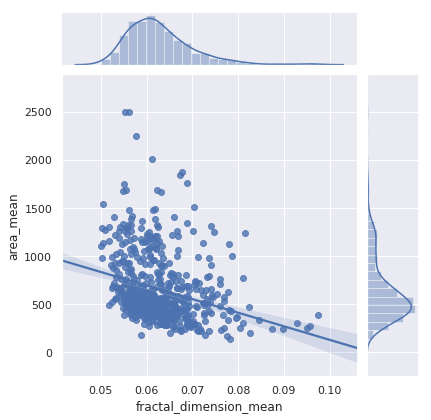

In [38]:
# Plot correlation between 2 features and distribution
sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
              X.loc[:,'radius_mean'], 
              kind="regg")

sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
              X.loc[:,'perimeter_mean'], 
              kind="regg")

sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
              X.loc[:,'area_mean'], 
              kind="regg")

### Verifing ig Dataset is Balanced

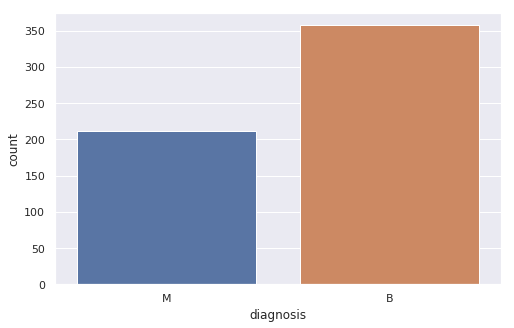

In [39]:
# Plot a countplot
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(y) 

Data ins't balenced, there is more case of benigns tumors that malignant. Later we'll use methods to balance data and analyze if results get better. 

In [40]:
# Print count
count = y.value_counts()
print 'Number of Benign : ',count[0] 
print 'Number of Malignant : ',count[1] 

Number of Benign :  357
Number of Malignant :  212
